# Detector para una insuficiencia cardíaca 
- Silva Velázquez Elsy Camila
- Longines Tapia Hugo Didier
- Andrés Urbano Guillermo Gerardo

La insuficiencia cardíaca es una enfermedad progresiva crónica en la que el músculo cardíaco no puede bombear suficiente sangre para satisfacer las necesidades de sangre y oxígeno del cuerpo.

### Objetivo 
- A través del estudio de los 13 atributos principales que se encuentran en el conjunto de datos, queremos clasificar aquellos que son determinantes para el desarrollo de esta enfermedad.
- Analizar las causantes de la insuficiencia cardíaca.
- Comparar cuál es el mejor clasificador para la detección temprana para una insuficiencia cardíaca.


Importamos la librerias necesarias para nuestro analisis:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Sobre la insuficiencia cardíaca.

El conjunto de datos sobre el cual trata este proyecto junta datos sobre factores posibles en cuanto a la causa de una insuficiencia cardíaca se refiere. Recolecta datos sobre diabetes, edad, alta presión sanguinea, entre otros factores. Al final existe una columna la cual registra las muertes por insuficiencia cardíaca. Por lo tanto primero tenemos que saber que es la insuficiencia cardíaca aunque sea de forma básica. 

La insuficiencia cardíaca es un padecimiento en el cual el corazón ya no es capaz de bombear sangre rica en oxígeno a todo el cuerpo de manera eficiente. Esto ocasiona diversos sintomas a lo largo del cuerpo y en otras ocasiones hasta la muerte. 

### Obteniendo los datos y exploración de nuestros datos

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Verificamos si existen datos faltantes:

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Para profundizar mejor el entendimiento de nuestras 13 columnas decidimos generar una mapa de correlación que nos ayudarán que variables estan más correlacionadas:

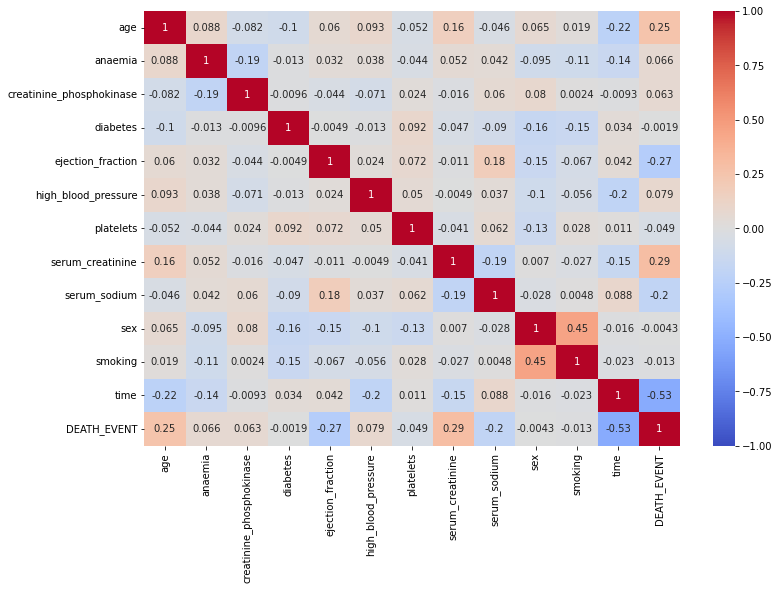

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1)
plt.show()

En el mapa podemos ver que las 3 características más correlacionadas (tanto positiva como negativamente) con el resultado de supervivencia de un paciente (DEATH_EVENT) son la fracción de eyección, la creatinina sérica y el tiempo.


## Datos de entrenamiento y prueba


Para construir nuestro clasificador sobre que personas estan propensas a un evento de fallas en el corazón, dividiremos nuestro conjunto de datos, en datos de entrenamiento y prueba:

In [ ]:
from sklearn.model_selection import train_test_split

# Sacamos nuestro conjunto de características (matriz de características X)
X, y = df.iloc[:, 0:-1].values, df.iloc[:,-1].values

# Dividimos nuestro conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(209, 12)
(209,)


## Usando pipelines para Regresión lineal y PCA

Vemos primeramento que hay algunos datos con un rango de valores muy grandes, por ejemplo las columnas de creatinina_fosfoquinasa y plaquetas, esto podria sesgar nuestro datos con los valores pequeños y haber un error en nuestro analisis, por eso decidimos estandarizar nuestros datos y posteriormente aplicar pca y regresón lineal para nuestro clasificador:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_lr=make_pipeline(StandardScaler(),
                      PCA(n_components=4),
                      LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en pruebas = %.3f' % pipe_lr.score(X_test, y_test))

Exactitud en pruebas = 0.822


Vemos que al variar el número de componenetes encontramos que la mayor exactitud que podemos lograr alcanzar son con 4 componentes principales con una exactitud de $82.2\%$ en el conjunto de pruebas. 

In [ ]:
pipe_lr=make_pipeline(StandardScaler(),
                      PCA(n_components=2),
                      LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en pruebas = %.3f' % pipe_lr.score(X_test, y_test))

Exactitud en pruebas = 0.767


Para ejemplo de nuestro analisís hemos decidio utilizar dos componentes para visualizar nuestro resultados, vemos que con dos componenetes principales tenemos una exactitud del $76.7\%$ en el conjunto de pruebas. Esto nos da hasta cierto punto una certeza, pero verlo gráficamente ayuda mas. 

## Visualizando nuestros datos de entrenamiento

Para visualizar nuestros datos usaremos la herramienta `mlxtend` que nos ayudará a dibujar nuestra linea de decisión y las regiones. 


In [ ]:
X_train_std = pipe_lr[0].fit_transform(X_train) # datos de entrenamiento
X_test_std = pipe_lr[0].transform(X_test) # datos de prueba

In [ ]:
# Ahora son de 2 dimensiones
X_train_pca = pipe_lr[1].fit_transform(X_train_std) 
X_test_pca = pipe_lr[1].transform(X_test_std)

In [ ]:
# Predecimos los valores de y según nuestro clasificador de regresión logistica
y_pred = pipe_lr[2].predict(X_test_pca)

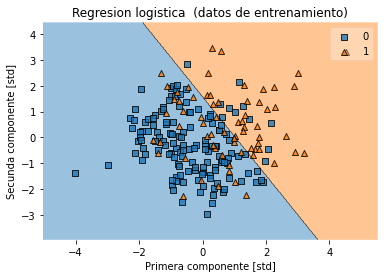

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_train_pca, y_train, clf=pipe_lr[2])
plt.xlabel('Primera componente [std]')
plt.ylabel('Secunda componente [std]')
plt.title("Regresion logistica  (datos de entrenamiento)")
plt.show()

- Los triangulos naranjas: el paciente falleció durante el período de seguimiento.
- Los cuadrados azul: no fallecieron durante el período de seguimiento.

En esta gráfica podemos observar que la división por medio de una linea si bien engloba de cierta forma bien el caso de los cuadros azules. El caso de los triángulos naranjas no es tan preciso según podemos observar. 
Con estos datos de entrenamiento podemos visualizar que los triángulos naranjas invaden mucho la zona azul de cierta forma. A este tema regresaremos al final. 

## Visualizando con datos de prueba

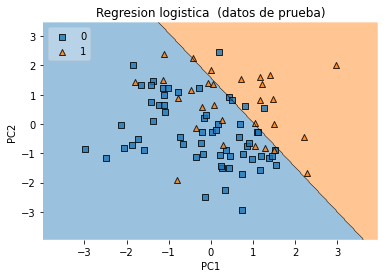

In [ ]:
plot_decision_regions(X_test_pca, y_test, clf=pipe_lr[2], legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Regresion logistica  (datos de prueba)")
plt.show()


Podemos ver que con los datos de prueba sucede lo mismo que con los de entrenamiento. Una división aceptable para los cuadros azules, pero una falla considerable en el caso de los triángulos naranjas. 


## Matriz de confusión 

In [ ]:
from sklearn . metrics import confusion_matrix

confmat = confusion_matrix( y_true = y_test , y_pred = y_pred )
print(confmat)

[[56  5]
 [16 13]]


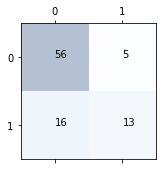

In [ ]:
fig, ax = plt.subplots(figsize =(2.5 , 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha =0.3)
for i in range (confmat.shape[0]):
    for j in range( confmat.shape [1]):
        ax.text( x =j , y =i , s = confmat [i , j ])

Como se muestra arriba, para los pacientes elegidos aleatoriamente del conjunto de datos cuando se dividieron los datos, el modelo clasificó correctamente 56 casos sin insuficiencia cardíaca y 13 casos de insuficiencia cardíaca. Entonces nos quedamos con 21 casos de clasificación incorrecta. Más concretamente, tenemos 5 casos de falsos positivos, donde los pacientes fueron clasificados como fallecidos cuando en realidad sobrevivieron, y 16 casos de falsos negativos, donde los pacientes fueron clasificados como sobrevivientes cuando en realidad fallecieron.

####  Metricas de evaluación de rendimiento

Por último, generamos una metricas para conocer que tan bien predice para conjuntos de prueba:

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Presicion: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('   Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('       F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))


Presicion: 0.722
   Recall: 0.448
       F1: 0.553


Como observamos anteriormete tiene una precisión del $70\%$ y para otras metricas se ve que no es tan efectivo la predicción para un conjunto desconocido.


## Usando pipeline con XGBoost

XGBoost es otra librería que podemos utilizar de forma alternativa para clasificar nuestros datos. Este tiene algunas diferencias considerables pero una de las mas importantes a destacar es la siguiente. 
El clasificador de XGBoost tiene restricciones automáticas para detenerse. Con el fin de no sobre-entrenar los datos XGBoost tiene 10 formas de detenerse automaticamente. 



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

pipe_lr=make_pipeline(StandardScaler(),
                      PCA(n_components=5),
                      XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en pruebas = %.3f' % pipe_lr.score(X_test, y_test))

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:30:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Exactitud en pruebas = 0.800


Vemos que el mayor porcentaje exactitud para este clasificador el del $80\%$ cuando se toman $5$ caractericticas principales.  Para efecto de nuestro analisís, tomaremos solo dos componenete principales para visualizar la clasificación de los datos.

### Clasificador con XGBoost

Este es otro algoritmo para clasificar, compararemos clasificadores para este conjunto de datos y ver cuál es más efectivo:

In [ ]:
import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)

clf.fit(X_train_pca, y_train)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:32:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Visualición con los datos de entrenamiento

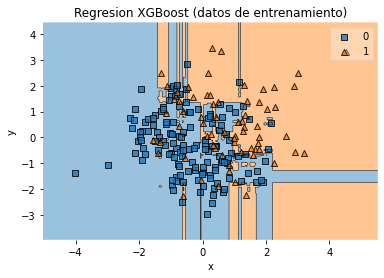

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_train_pca, y_train, clf=clf)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Regresion XGBoost (datos de entrenamiento)")
plt.show()


Podemos ver una clara diferencia en la gráfica a comparación de las primeras. 
Utilizando los mismos datos de entrenamiento, pero un clasificador diferente, podemos ver que no divide los datos por medio de una linea recta. En este caso podríamos decir que se adapta mas a los datos que tenemos. Es como si este clasificador considerará cada punto en especifico a la hora de hacer la división intentando ajustar el área de cada conjunto de tal forma que cada punto quede englobado por esta área. 

### Visualizacion con datos de prueba

In [ ]:
y_pred_b = clf.predict(X_test_pca)

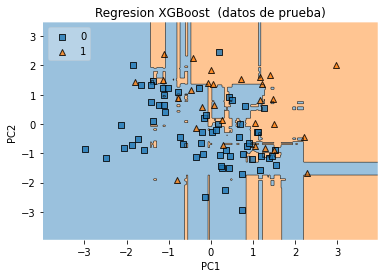

In [ ]:
plot_decision_regions(X_test_pca, y_test, clf=clf, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Regresion XGBoost  (datos de prueba)")
plt.show()

Vemos que a primera instancia tiene una major exactitud al conjunto de pruebas porque esta más ajutado con los puntos.
También podemos observar que al ser el mismo clasificador la forma de generar una gráfica es una que se intenta adaptar a los puntos alterando el área de manera "irregular". 

## Matriz de confusión

In [ ]:
from sklearn . metrics import confusion_matrix

confmat = confusion_matrix( y_true = y_test , y_pred = y_pred_b)
print(confmat)

[[54  7]
 [14 15]]


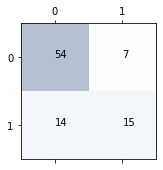

In [ ]:
fig , ax = plt.subplots(figsize =(2.5 , 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha =0.3)
for i in range (confmat.shape[0]):
    for j in range( confmat.shape [1]):
        ax.text( x =j , y =i , s = confmat [i , j ])

Como se muestra arriba, para los pacientes elegidos aleatoriamente del conjunto de datos cuando se dividieron los datos, el modelo clasificó correctamente 54 casos sin insuficiencia cardíaca y 15 casos de insuficiencia cardíaca. Entonces nos quedamos con 21 casos de clasificación incorrecta. Más concretamente, tenemos 7 casos de falsos positivos, donde los pacientes fueron clasificados como fallecidos cuando en realidad sobrevivieron, y 14 casos de falsos negativos, donde los pacientes fueron clasificados como sobrevivientes cuando en realidad fallecieron.

#### Metricas de evaluación de rendimiento

In [ ]:
print('Presicion: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_b))
print('   Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_b))
print('       F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_b))

Presicion: 0.682
   Recall: 0.517
       F1: 0.588


Vemos que en la evaluación del rendimiento del modelo los portentajes son muy bajos, pensamos que es debido a que se ajustan muy bien a los datos de entranamiento como vimos anteriormente en la gráfica, haciendo que en los datos de prueba no coincida siempre con las regiones establecidas que se genero con los datos de entrenamiento.

Por último hemos agregado un poco de estadistica acerca de nuestro datos  y la insuficiencia cardíaca, nos enfocamos en comparar la mortalidad con la presión alta, la diabetes, la anemia y si el paciente fuma. Ya que estos datos son booleanos ya que indican una condición especifica.
Hay que notar que algunos pacientes pueden presentar varias condiciones a la vez. 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

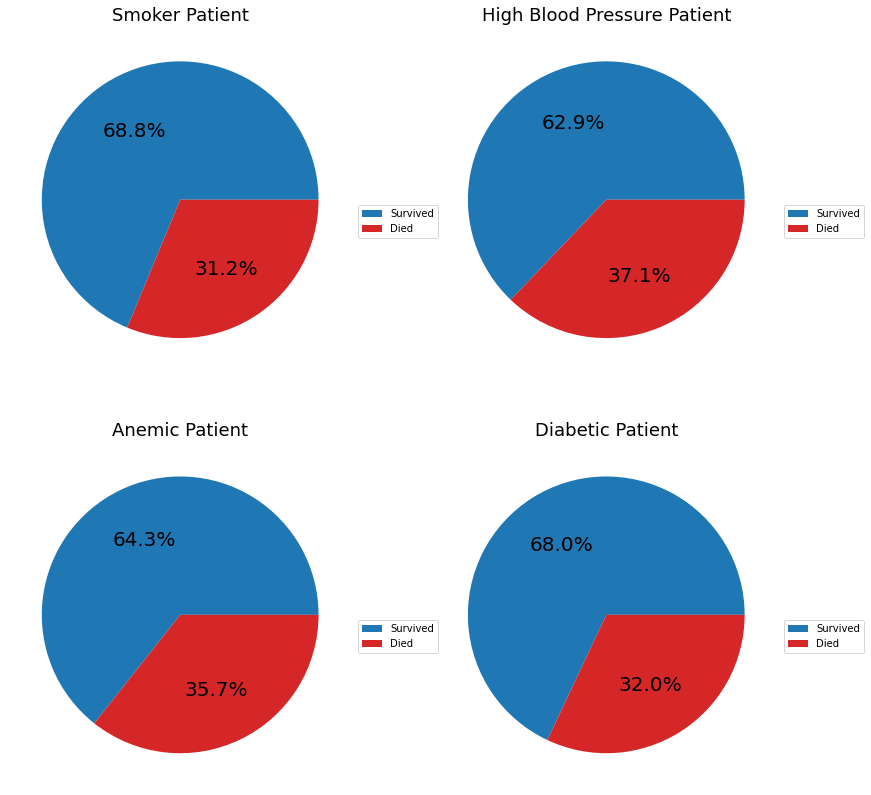

In [ ]:
plt.figure(figsize=(14,14))

plt.subplot(221)
smoker = df[df['smoking']==1]
smoker_surv = smoker[df['DEATH_EVENT']==0]['smoking']
smoker_died = smoker[df['DEATH_EVENT']==1]['smoking']
smoker_vals = [len(smoker_surv), len(smoker_died)]
labels = ['Survived', 'Died']
plt.pie(smoker_vals, autopct='%1.1f%%', textprops=dict(color='black', size=20), colors=['tab:blue', 
                                                                                        'tab:red'])
plt.legend(labels, loc='best', bbox_to_anchor=(1,0.5))
plt.title('Smoker Patient', fontsize = 18)

plt.subplot(222)
hbp = df[df['high_blood_pressure']==1]
hbp_surv = hbp[df['DEATH_EVENT']==0]['high_blood_pressure']
hbp_died = hbp[df['DEATH_EVENT']==1]['high_blood_pressure']
hbp_vals = [len(hbp_surv), len(hbp_died)]
labels = ['Survived', 'Died']
plt.pie(hbp_vals, autopct='%1.1f%%', textprops=dict(color='black', size=20), colors=['tab:blue', 
                                                                                        'tab:red'])
plt.legend(labels, loc='best', bbox_to_anchor=(1,0.5))
plt.title('High Blood Pressure Patient', fontsize = 18)

plt.subplot(223)
anaemia = df[df['anaemia']==1]
anaemia_surv = anaemia[df['DEATH_EVENT']==0]['anaemia']
anaemia_died = anaemia[df['DEATH_EVENT']==1]['anaemia']
diabetes_vals = [len(anaemia_surv), len(anaemia_died)]
labels = ['Survived', 'Died']
plt.pie(diabetes_vals, autopct='%1.1f%%', textprops=dict(color='black', size=20), colors=['tab:blue', 
                                                                                        'tab:red'])
plt.legend(labels, loc = 'best', bbox_to_anchor=(1,0.5))
plt.title('Anemic Patient', fontsize = 18)

plt.subplot(224)
diabetes = df[df['diabetes']==1]
diabetes_surv = diabetes[df['DEATH_EVENT']==0]['diabetes']
diabetes_died = diabetes[df['DEATH_EVENT']==1]['diabetes']
anaemic_vals = [len(diabetes_surv), len(diabetes_died)]
labels = ['Survived', 'Died']
plt.pie(anaemic_vals, autopct='%1.1f%%', textprops=dict(color='black', size=20), colors=['tab:blue', 
                                                                                        'tab:red'])
plt.legend(labels, loc = 'best', bbox_to_anchor=(1,0.5))
plt.title('Diabetic Patient', fontsize = 18)

plt.show()


En el caso de los pacientes fumadores podemos observar que tienen la mayoría de porcentaje de supervivencia al igual que en el caso de pacientes con diabetes.  
Hay que notar que en todos los casos que observamos, el porcentaje de sobrevivientes es mayor a un 60 por ciento. Es decir que mas de la mitad de de los pacientes con estos padecimientos (ya sea que tengan uno o mas de uno) tienen mas de la mitad del porcentaje de sobrevivir, pero incrementa el riesgo.

Recordando lo que mencionabamos al principio. La insuficiencia cardíaca es una falla del corazón la cual se ocasiona a la hora de tener sangre que no esta bien oxigenda. Y como vemos en las gráficas de arriba. El mayor pocentaje de mortalidad lo tiene la condición de presión alta de la sangre. Esto suena obvio, pero es rescatable ya que no solo tiene sentido. Que una condición en la sangre, te pueda ocasionar un padecimiento relacionado a la sangre. Si no que también podemos observarlo con estas gráficas. 

Como conslusión final vemos que el mejor clasificador que encontramos para $2$ componenete es el clasificador de regresión logistica ya que no sobreajusta los datos como lo hace XGBoost, pero vemos que podemos aumentar la exactid hasta un $80\%$ sí utilizamos hasta 5 componenetes para XGBoost y 4 componentes para regresión logistica. Este clasificador puede ayudar a muchos pacientes para una detección temprana de insuficiencia cardíaca y poder tratarlo adecuademente, vemos que esto puede ser una herramienta más para los doctores y puede complementarse con más estudios especializados. 


### Referencias
- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data  consultado el 17/11/21
- https://medlineplus.gov/spanish/ency/article/000158.htm   consultado el 21/11/21
- https://www.kaggle.com/uelepaga/heart-failure-analysis-and-classification  consultado el 18/11/21
- https://www.kaggle.com/pavelivanov89/analysis-of-heart-failure-set  consultado el 21/11/21

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c8bd33b-1599-4ec8-b975-d82e304d32c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>